In [115]:
#!python -m pip install plotly
#!python -m pip install pygraphviz
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,recall_score,precision_score, auc, roc_curve, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import Markdown as md
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from operator import itemgetter
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
import keras
from keras.optimizers import SGD
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.callbacks import LearningRateScheduler
import math
from collections.abc import Iterable

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\User\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-cph31l86\\pygraphviz\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-cph31l86\\pygraphviz\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\User\AppData\Local\Temp\pip-wheel-zky945zn'
       cwd: C:\Users\User\AppData\Local\Temp\pip-install-cph31l86\pygraphviz\
  Complete output (53 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-3.8\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-3.8\pygraphviz
  copying pygraphviz

  Using cached pygraphviz-1.10.zip (120 kB)
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
    Running setup.py install for pygraphviz: started
    Running setup.py install for pygraphviz: finished with status 'error'


  copying pygraphviz\tests\test_graph.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_html.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_layout.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_node_attributes.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_readwrite.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_repr_mimebundle.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_scraper.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_string.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_subgraph.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\test_unicode.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  copying pygraphviz\tests\__init__.py -> build\lib.win-amd64-3.8\pygraphviz\tests
  running egg_info
  writing pygrap

In [14]:
df =  pd.read_csv('D:/учеба/ML/data/results.csv')

In [15]:
df["date"] = pd.to_datetime(df["date"])

In [16]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [17]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [18]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44529,2023-03-28,United Arab Emirates,Thailand,2,0,Friendly,Abu Dhabi,United Arab Emirates,False
44530,2023-03-28,Uzbekistan,Venezuela,1,1,Friendly,Jeddah,Saudi Arabia,True
44531,2023-03-28,Eswatini,Cape Verde,0,1,African Cup of Nations qualification,Mbombela,South Africa,True
44533,2023-03-28,Namibia,Cameroon,2,1,African Cup of Nations qualification,Soweto,South Africa,True
44556,2023-03-29,Rwanda,Benin,1,1,African Cup of Nations qualification,Kigali,Rwanda,False


In [19]:
df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True)

In [20]:
df = df[(df["date"] <= "2022-10-19")].reset_index(drop=True)

In [21]:
df.sort_values("date").tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3739,2022-09-27,Ivory Coast,Guinea,3,1,Friendly,Amiens,France,True
3740,2022-09-27,South Korea,Cameroon,1,0,Friendly,Seoul,South Korea,False
3731,2022-09-27,Costa Rica,Uzbekistan,2,1,Friendly,Suwon,South Korea,True
3763,2022-09-30,Fiji,Solomon Islands,1,0,MSG Prime Minister's Cup,Luganville,Vanuatu,True
3764,2022-10-01,Saint Vincent and the Grenadines,Grenada,1,5,Friendly,Kingstown,Saint Vincent and the Grenadines,False


In [22]:
rank = pd.read_csv('D:/учеба/ML/data/fifa_ranking-2022-12-22.csv')

In [23]:
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True)
rank = rank[(rank["rank_date"] <= "2022-10-19")].reset_index(drop=True)

In [24]:
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [25]:
ranking_df = pd.pivot_table(data = rank, 
                            values = 'total_points',
                            index = 'country_full',
                            columns = 'rank_date').fillna(0.0)
ranking_df.head()

rank_date,2018-08-16,2018-09-20,2018-10-25,2018-11-29,2018-12-20,2019-02-07,2019-04-04,2019-06-14,2019-07-25,2019-09-19,...,2021-08-12,2021-09-16,2021-10-21,2021-11-19,2021-12-23,2022-02-10,2022-03-31,2022-06-23,2022-08-25,2022-10-06
country_full,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1068.0,1068.0,1068.0,1068.0,1068.0,1066.0,1057.0,1058.0,1058.0,1062.0,...,1045.34,1045.34,1045.34,1049.77,1049.77,1049.77,1049.77,1023.04,1023.04,1023.04
Albania,1384.0,1383.0,1372.0,1372.0,1372.0,1372.0,1368.0,1362.0,1362.0,1372.0,...,1359.83,1368.73,1374.33,1374.98,1374.98,1374.98,1371.86,1361.81,1361.81,1354.11
Algeria,1351.0,1343.0,1339.0,1347.0,1347.0,1349.0,1348.0,1346.0,1463.0,1466.0,...,1498.75,1498.62,1509.04,1508.54,1516.51,1460.93,1461.26,1480.59,1480.59,1489.10
American Samoa,908.0,908.0,908.0,908.0,908.0,908.0,908.0,908.0,900.0,900.0,...,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27
Andorra,1120.0,1121.0,1109.0,1111.0,1111.0,1111.0,1099.0,1082.0,1082.0,1075.0,...,1031.64,1033.27,1038.88,1030.28,1030.28,1030.28,1040.13,1028.70,1028.70,1035.20


In [26]:
best_ranks = ranking_df.loc[ranking_df['2022-10-06'].sort_values(ascending = False)[:10].index]
fig = go.Figure()

for i in range(len(best_ranks.values)):
    fig.add_trace(go.Scatter(x = best_ranks.columns, 
                             y = best_ranks.iloc[i],
                             name = best_ranks.index[i]))
    
fig.update_layout(
    title="Эволюция рейтинга ФИФА топ-10 команд",
    yaxis_title="Points"
)
fig.show()

In [27]:
rank

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,France,FRA,1726.00,1576.00,-6,UEFA,2018-08-16
1,202,Cayman Islands,CAY,880.00,880.00,0,CONCACAF,2018-08-16
2,67,Guinea,GUI,1344.00,1344.00,-1,CAF,2018-08-16
3,67,Côte d'Ivoire,CIV,1344.00,1344.00,-1,CAF,2018-08-16
4,66,Algeria,ALG,1351.00,1352.00,0,CAF,2018-08-16
...,...,...,...,...,...,...,...,...
7148,134,Latvia,LVA,1114.21,1125.36,5,UEFA,2022-10-06
7149,133,Philippines,PHI,1115.13,1115.13,-1,AFC,2022-10-06
7150,132,Central African Republic,CTA,1116.97,1116.06,-1,CAF,2022-10-06
7151,131,Antigua and Barbuda,ATG,1117.01,1117.01,-1,CONCACAF,2022-10-06


Text(0.5, 1.0, 'ТОП 10 ТИПОВ ТУРНИРНЫХ МАТЧЕЙ ')

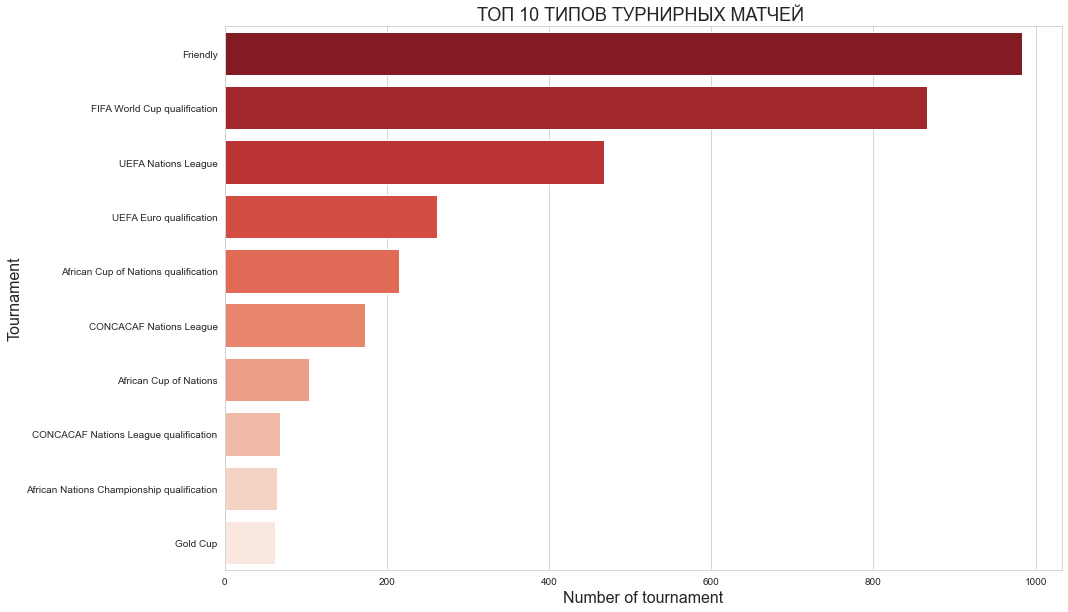

In [28]:
tournament = df['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("ТОП 10 ТИПОВ ТУРНИРНЫХ МАТЧЕЙ ", fontsize=18)

In [29]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [30]:
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)

df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)

In [31]:
df = df_wc_ranked

In [32]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [33]:
df[["result", "home_team_points", "away_team_points"]] = results

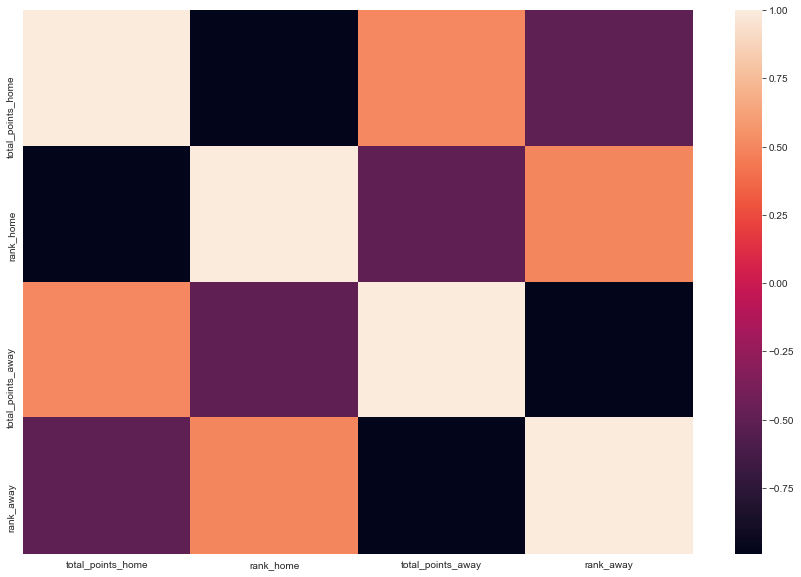

In [34]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

In [35]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [36]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [37]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [38]:
home_team

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2018-08-18,Andorra,0,0,130.0,77.0,0.0,1120.00,2,53.0,0.012987,1
1,2018-08-18,Grenada,1,5,168.0,54.0,0.0,980.00,1,114.0,0.000000,0
2,2018-08-18,Guatemala,1,0,146.0,181.0,0.0,1064.00,0,-35.0,0.016575,3
3,2018-08-20,Barbados,2,2,160.0,54.0,0.0,1005.00,2,106.0,0.018519,1
4,2018-08-26,Barbados,0,0,160.0,181.0,0.0,1005.00,2,-21.0,0.005525,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2022-09-27,Norway,0,2,36.0,25.0,0.0,1488.57,1,11.0,0.000000,0
3333,2022-09-27,Sweden,1,1,20.0,65.0,0.0,1563.44,2,-45.0,0.015385,1
3334,2022-09-27,Kosovo,5,1,106.0,108.0,0.0,1183.90,0,-2.0,0.027778,3
3335,2022-09-27,Greece,3,1,49.0,58.0,1.0,1441.45,0,-9.0,0.051724,3


In [39]:
team_stats = pd.concat([home_team, away_team])

In [40]:
team_stats

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2018-08-18,Andorra,0,0,130.0,77.0,0.0,1120.00,2,53.0,0.012987,1
1,2018-08-18,Grenada,1,5,168.0,54.0,0.0,980.00,1,114.0,0.000000,0
2,2018-08-18,Guatemala,1,0,146.0,181.0,0.0,1064.00,0,-35.0,0.016575,3
3,2018-08-20,Barbados,2,2,160.0,54.0,0.0,1005.00,2,106.0,0.018519,1
4,2018-08-26,Barbados,0,0,160.0,181.0,0.0,1005.00,2,-21.0,0.005525,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2022-09-27,Serbia,2,0,25.0,36.0,0.0,1549.53,1,11.0,0.083333,3
3333,2022-09-27,Slovenia,1,1,65.0,20.0,0.0,1372.48,2,-45.0,0.050000,1
3334,2022-09-27,Cyprus,1,5,108.0,106.0,1.0,1180.52,0,-2.0,0.000000,0
3335,2022-09-27,Northern Ireland,1,3,58.0,49.0,0.0,1399.10,0,-9.0,0.000000,0


In [41]:
team_stats_raw = team_stats.copy()

In [42]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [43]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [44]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [45]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [46]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [47]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [48]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [49]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [50]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [51]:
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [52]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
3332,2022-09-27,Norway,Serbia,36.0,25.0,0,2,1,11.0,0.0,...,1.833333,2.0,0.041984,0.090235,1.866667,2.0,0.053327,0.073887,1,0
3333,2022-09-27,Sweden,Slovenia,20.0,65.0,1,1,2,-45.0,0.0,...,1.607843,0.6,0.048520,0.009231,1.404762,1.0,0.026035,0.029545,1,0
3334,2022-09-27,Kosovo,Cyprus,106.0,108.0,5,1,0,-2.0,0.0,...,1.326087,1.2,0.018478,0.016825,0.767442,1.0,0.009687,0.019652,1,0
3335,2022-09-27,Greece,Northern Ireland,49.0,58.0,3,1,0,-9.0,1.0,...,1.590909,2.4,0.050090,0.028040,1.139535,1.0,0.022315,0.009470,1,0
3336,2022-09-30,Fiji,Solomon Islands,163.0,137.0,1,0,0,26.0,0.0,...,1.500000,1.4,0.009432,0.008868,1.714286,2.0,0.010013,0.012387,1,0


In [53]:
base_df.isna().sum()

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                  101
home_goals_mean_l5               101
home_goals_suf_mean              101
home_goals_suf_mean_l5           101
home_rank_mean                   101
home_rank_mean_l5                101
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                  100
away_goals_mean_l5               100
away_goals_suf_mean              100
away_goals_suf_mean_l5           100
away_rank_mean                   100
away_rank_mean_l5                100
away_points_mean                   0
away_points_mean_l5                0
h

In [54]:
base_df_no_fg = base_df.dropna()

In [55]:
base_df_no_fg

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
4,2018-08-26,Barbados,Cuba,160.0,181.0,0,0,2,-21.0,0.0,...,1.000000,1.0,0.018519,0.018519,0.000000,0.0,0.000000,0.000000,0,1
6,2018-08-29,Barbados,Cuba,160.0,181.0,0,2,1,-21.0,0.0,...,1.000000,1.0,0.012022,0.012022,0.500000,0.5,0.003125,0.003125,0,1
31,2018-09-06,Mongolia,Guam,186.0,190.0,1,1,2,-4.0,0.0,...,3.000000,3.0,0.016216,0.016216,0.000000,0.0,0.000000,0.000000,1,0
32,2018-09-06,Nepal,Bhutan,161.0,183.0,4,0,0,-22.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1,0
33,2018-09-06,Bangladesh,Pakistan,194.0,201.0,1,0,0,-7.0,0.0,...,1.500000,1.5,0.008197,0.008197,3.000000,3.0,0.018634,0.018634,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,2022-09-27,Norway,Serbia,36.0,25.0,0,2,1,11.0,0.0,...,1.833333,2.0,0.041984,0.090235,1.866667,2.0,0.053327,0.073887,1,0
3333,2022-09-27,Sweden,Slovenia,20.0,65.0,1,1,2,-45.0,0.0,...,1.607843,0.6,0.048520,0.009231,1.404762,1.0,0.026035,0.029545,1,0
3334,2022-09-27,Kosovo,Cyprus,106.0,108.0,5,1,0,-2.0,0.0,...,1.326087,1.2,0.018478,0.016825,0.767442,1.0,0.009687,0.019652,1,0
3335,2022-09-27,Greece,Northern Ireland,49.0,58.0,3,1,0,-9.0,1.0,...,1.590909,2.4,0.050090,0.028040,1.139535,1.0,0.022315,0.009470,1,0


In [56]:
df = base_df_no_fg

In [57]:
def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

In [58]:
data1 = df[list(df.columns[8:20].values) + ["target"]]
data2 = df[df.columns[20:]]

In [59]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

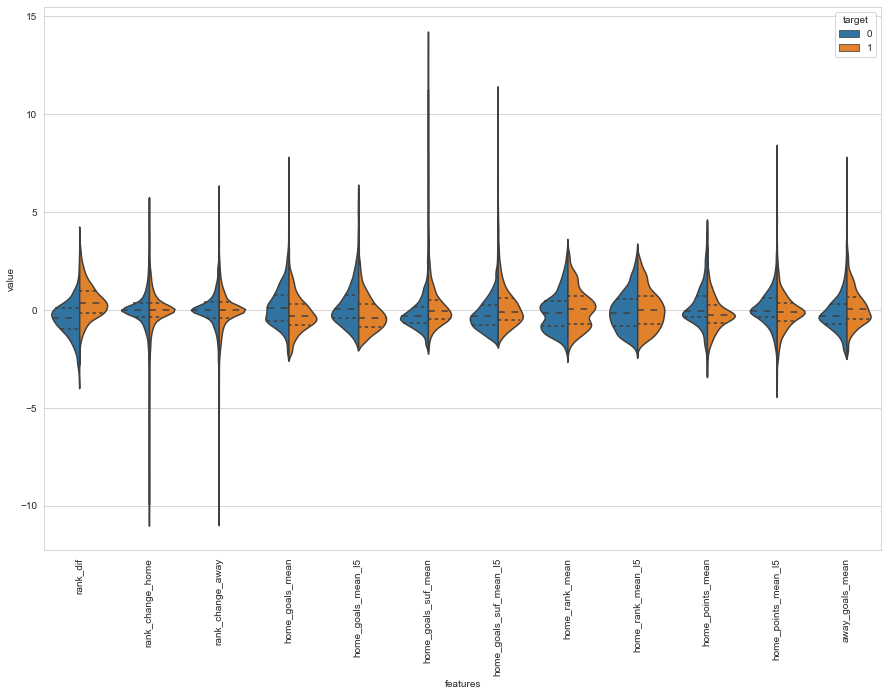

In [60]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

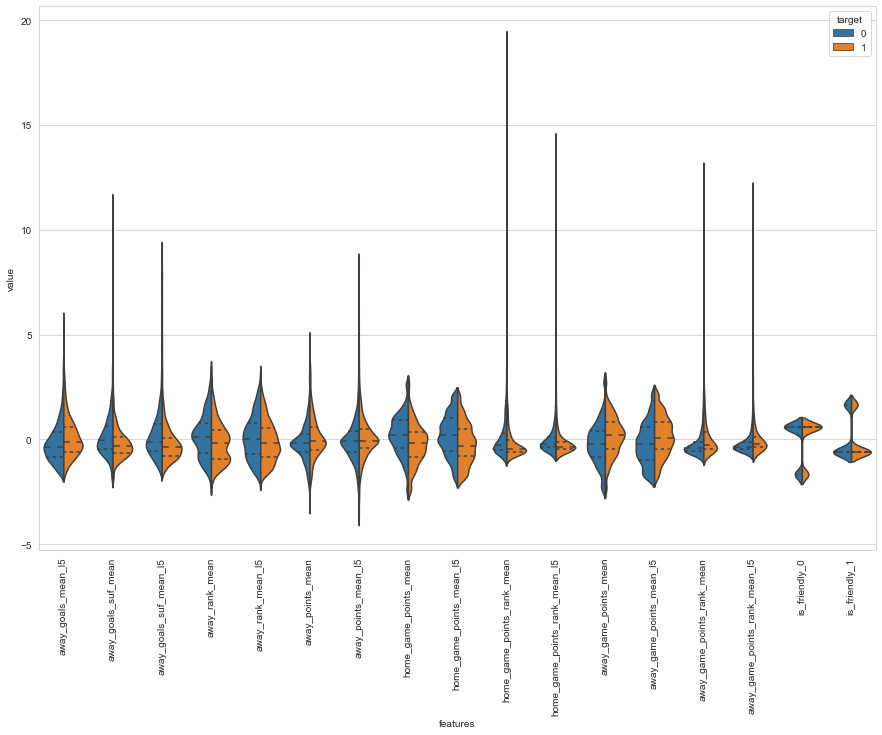

In [61]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [62]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]

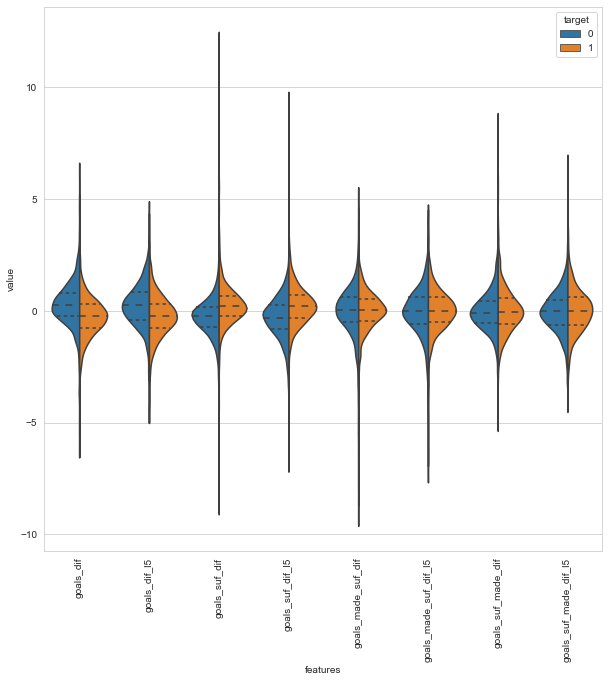

In [63]:
data_difs = dif.iloc[:, -8:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [64]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]

In [65]:
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

In [66]:
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

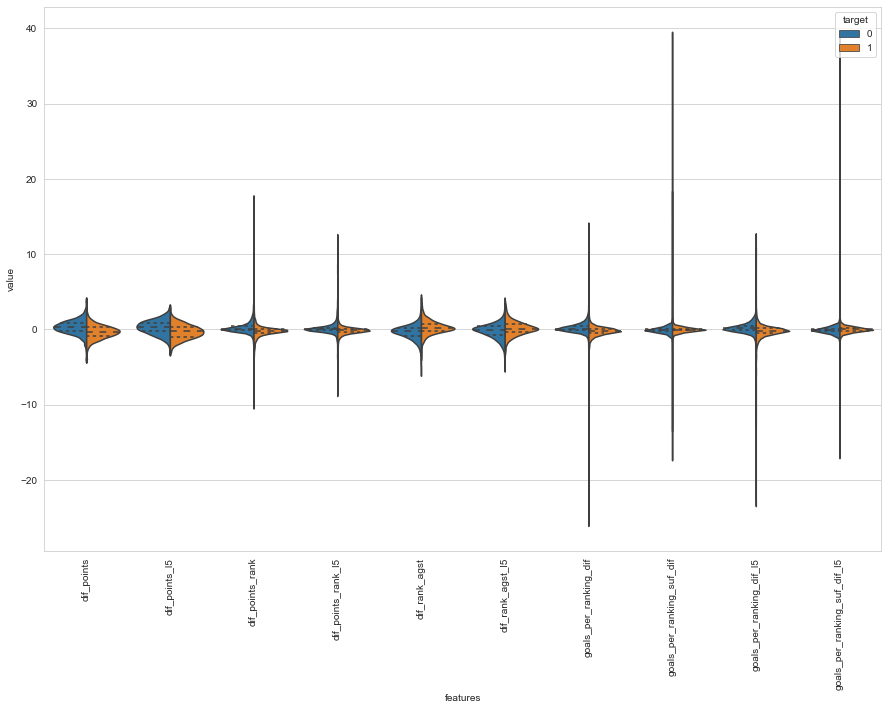

In [67]:
data_difs = dif.iloc[:, -10:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

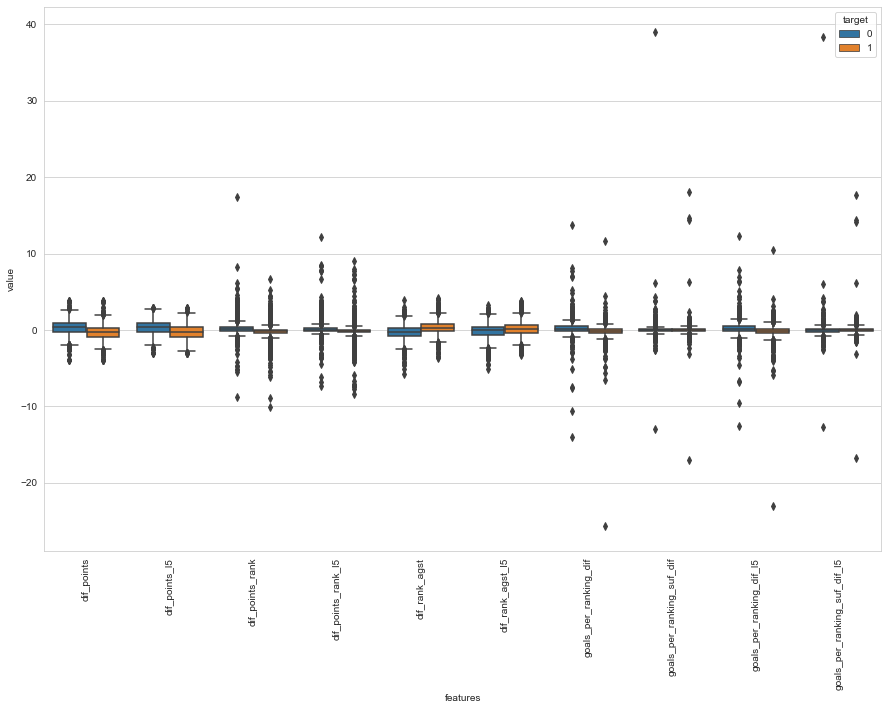

In [68]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=violin)
plt.xticks(rotation=90)
plt.show()

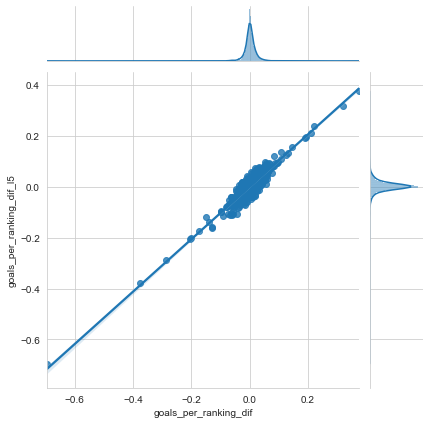

In [69]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

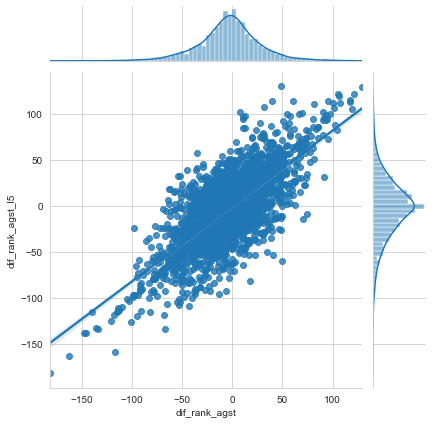

In [70]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

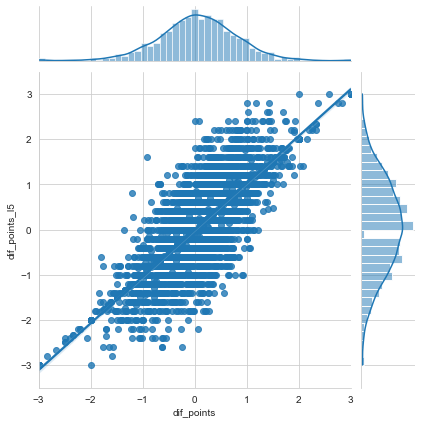

In [71]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

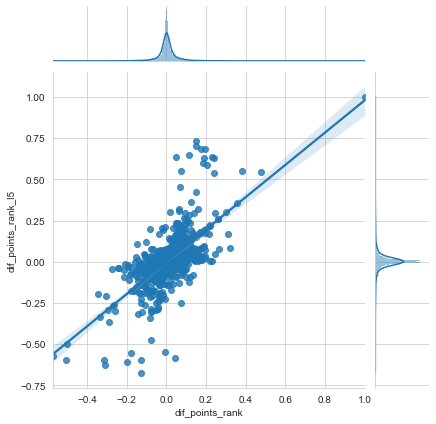

In [72]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

In [ ]:
# финальные фичи: 
# rank_dif
# goals_dif
# goals_dif_l5
# goals_suf_dif
# goals_suf_dif_l5
# dif_rank_agst
# dif_rank_agst_l5
# goals_per_ranking_dif
# dif_points_rank
# dif_points_rank_l5
# is_friendly

In [73]:
def create_db(df):
    columns = ["home_team", "away_team", "target", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    
    model_df = base[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

In [74]:
model_db = create_db(df)

In [75]:
model_db

,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
4,Barbados,Cuba,1,-21.0,2.000000,2.0,1.000000,1.0,0.037037,-92.000000,-92.0,0.018519,0.018519,0,1
6,Barbados,Cuba,1,-21.0,1.000000,1.0,0.500000,0.5,0.008511,-35.500000,-35.5,0.008897,0.008897,0,1
31,Mongolia,Guam,1,-4.0,4.000000,4.0,-1.000000,-1.0,0.021622,0.000000,0.0,0.016216,0.016216,1,0
32,Nepal,Bhutan,0,-22.0,1.000000,1.0,0.000000,0.0,0.004975,7.000000,7.0,0.000000,0.000000,1,0
33,Bangladesh,Pakistan,0,-7.0,-1.000000,-1.0,-0.500000,-0.5,-0.007200,30.500000,30.5,-0.010437,-0.010437,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,Norway,Serbia,1,11.0,-0.038095,-0.8,-0.230159,0.0,-0.005282,9.014286,-3.4,-0.011343,0.016348,1,0
3333,Sweden,Slovenia,1,-45.0,0.030812,0.2,0.137255,0.2,0.009459,-25.102241,10.2,0.022485,-0.020314,1,0
3334,Kosovo,Cyprus,0,-2.0,0.667341,0.6,-0.463094,0.0,0.007625,7.037917,1.6,0.008791,-0.002827,1,0
3335,Greece,Northern Ireland,0,-9.0,0.067653,0.2,-0.369979,-1.2,-0.002915,16.024841,0.6,0.027775,0.018570,1,0


# Модели

In [76]:
X = model_db.iloc[:, 3:]
y = model_db[["target"]]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [78]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [79]:
gb = gb_cv.best_estimator_

In [80]:
gb

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=10,
                           n_estimators=200, random_state=5)

In [81]:
params_rf = {"max_depth": [5, 10, 20],
                "min_samples_split": [10, 20],
                "max_leaf_nodes": [175, 200, 150],
                "min_samples_leaf": [5, 10],
                "n_estimators": [250, 300],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175, 200, 150],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 20],
                         'n_estimators': [250, 300]},
             verbose=False)

In [82]:
rf = rf_cv.best_estimator_

In [83]:
rf

RandomForestClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=175,
                       min_samples_leaf=5, min_samples_split=20,
                       n_estimators=250, random_state=1)

In [84]:
params_lr = {"max_iter": [100, 175, 250],
                }

lr = LogisticRegression()

lr_cv = GridSearchCV(lr, params_lr, cv = 3, n_jobs = -1, verbose = False)

lr_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 175, 250]}, verbose=False)

In [85]:
lr = lr_cv.best_estimator_

In [86]:
lr

LogisticRegression(max_iter=250)

In [87]:
params_kn = {"n_neighbors": [20, 30, 40],
                "weights": ["uniform", "distance"],
                "p": [1, 2],
                "algorithm": ["auto"],
                }


kn = KNeighborsClassifier()

kn_cv = GridSearchCV(kn, params_kn, cv = 3, n_jobs = -1, verbose = False)

kn_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'n_neighbors': [20, 30, 40],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=False)

In [88]:
kn = kn_cv.best_estimator_

In [89]:
kn

KNeighborsClassifier(n_neighbors=30)

In [90]:
# params_gb = {"n_neighbors": [20, 30, 40],
#                 "weights": ["uniform", "distance"],
#                 "p": [1, 2],
#                 "algorithm": ["auto"],
#                 }


gbb = GaussianNB()

#gb_cv = GridSearchCV(gb, params_gb, cv = 3, n_jobs = -1, verbose = False)

gbb.fit(X_train.values, np.ravel(y_train))

GaussianNB()

In [91]:
gb

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=10,
                           n_estimators=200, random_state=5)

In [92]:
# model = Sequential()
# model.add(Flatten(input_shape=(1,2)))
# model.add(Dense(18,activation = 'relu', input_shape=(1,2),input_dim=20, kernel_initializer = 'uniform'))
# model.add(Dropout(0.50))
# model.add(Dense(32, kernel_regularizer=regularizers.L2(1e-4),bias_regularizer=regularizers.L2(1e-4),
# activity_regularizer=regularizers.L2(1e-4)))
# #model.add(Dropout(0.50))
# model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 18)                54        
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                608       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 695
Trainable params: 695
Non-trainable params: 0
_________________________________________________________________


In [93]:
# initial_learning_rate = 0.09
# def lr_step_decay(epoch, lr):
#     drop_rate = 0.5
#     epochs_drop = 10.0
#     return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

In [94]:
# sgd = SGD(learning_rate = 0.01, momentum = 0.9)
# #adam = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, decay=0.0)
# model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
# #model.fit(x_train, y_train, batch_size = 32, epochs = 30, verbose=2,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])
# history = model.fit(X_train.values, np.ravel(y_train), batch_size = 32, epochs = 30, verbose=2,callbacks=[LearningRateScheduler(lr_step_decay, verbose=1)],)


Epoch 1: LearningRateScheduler setting learning rate to 0.09.
Epoch 1/30


ValueError: in user code:

    File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1, 2), found shape=(None, 12)


In [95]:
def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")

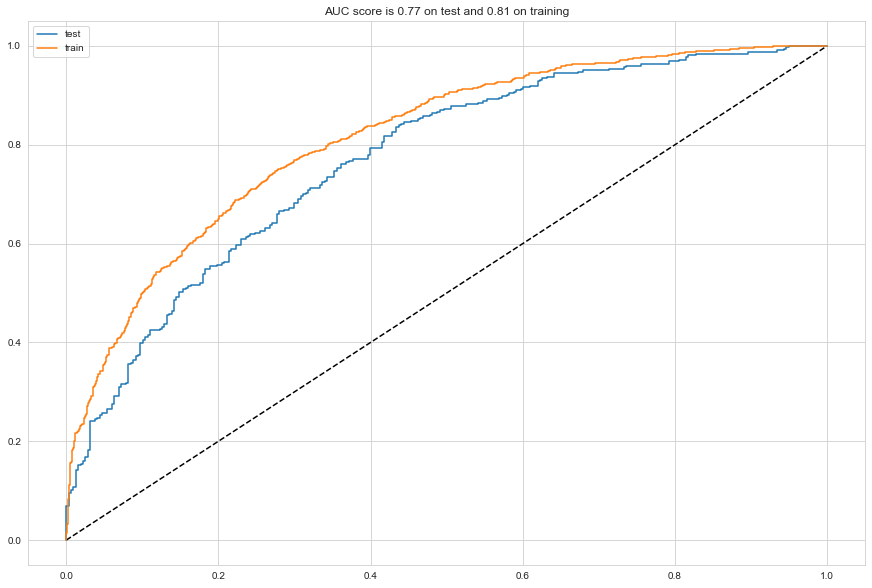

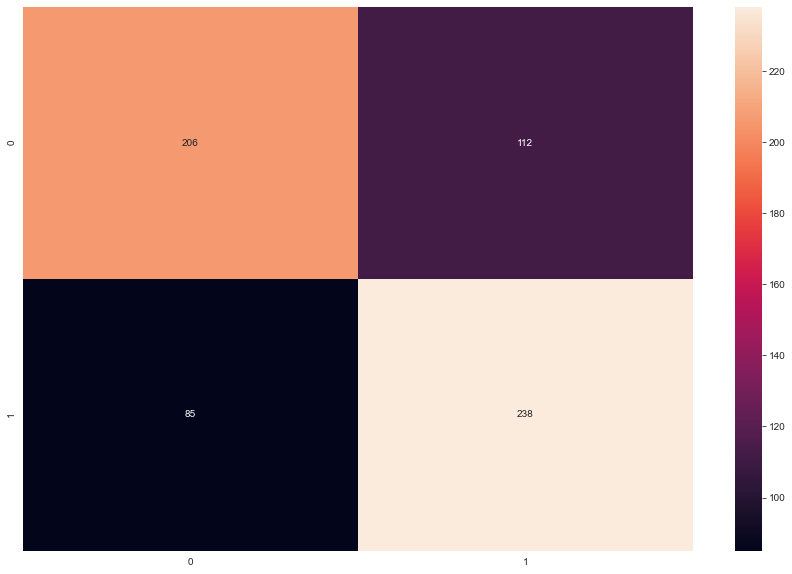

In [96]:
analyze(gb)

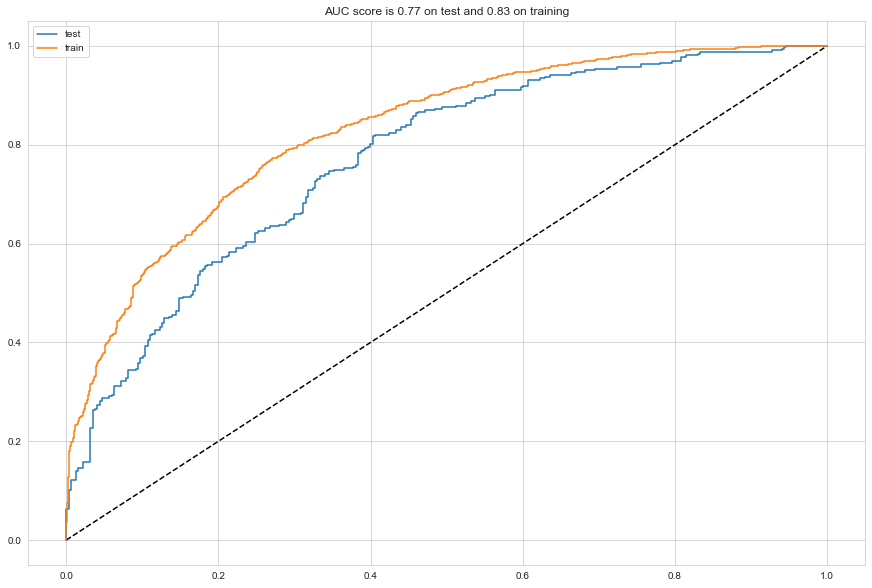

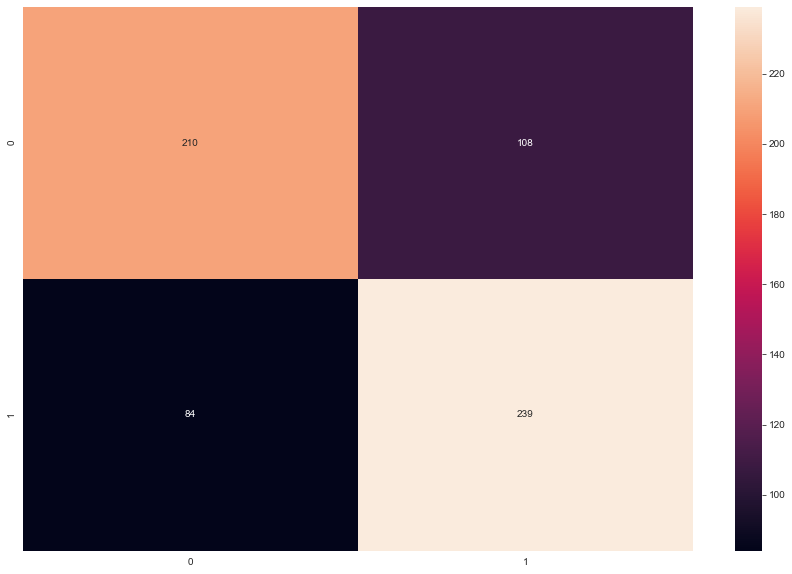

In [97]:
analyze(rf)

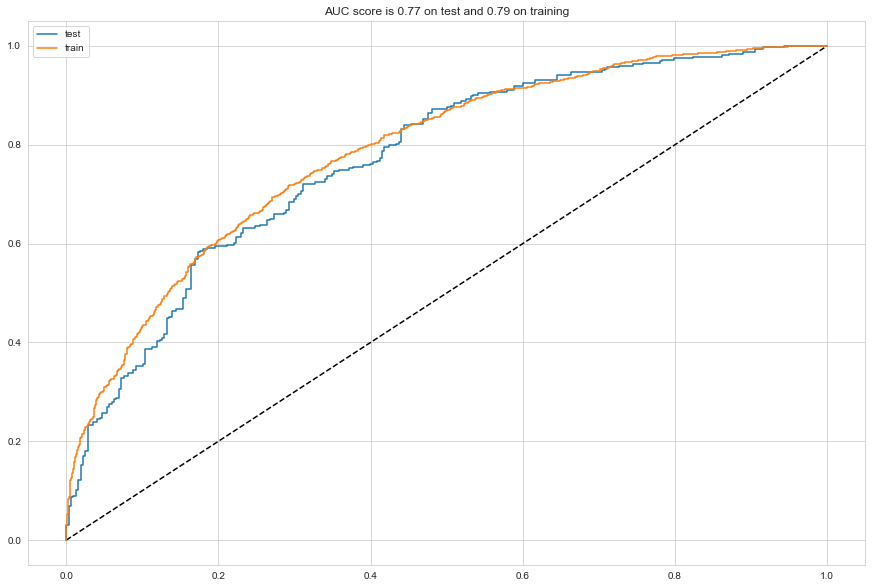

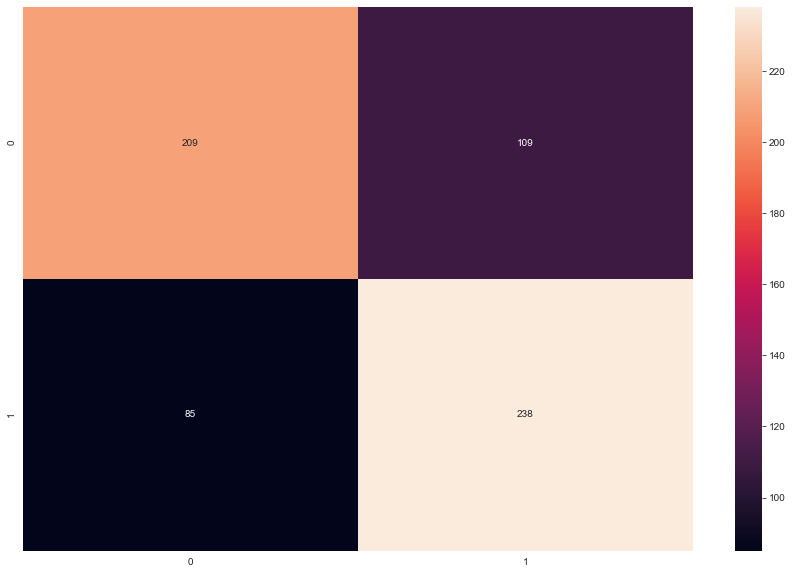

In [98]:
analyze(lr)

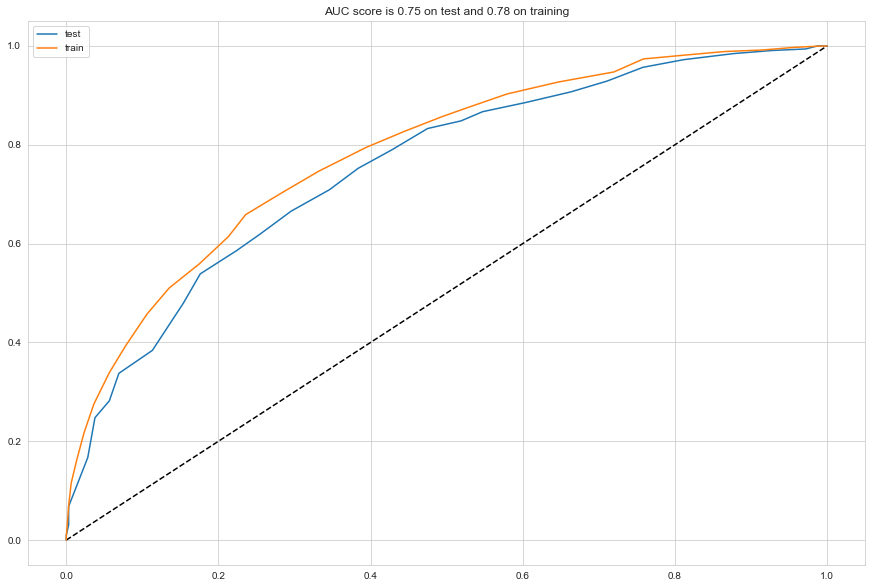

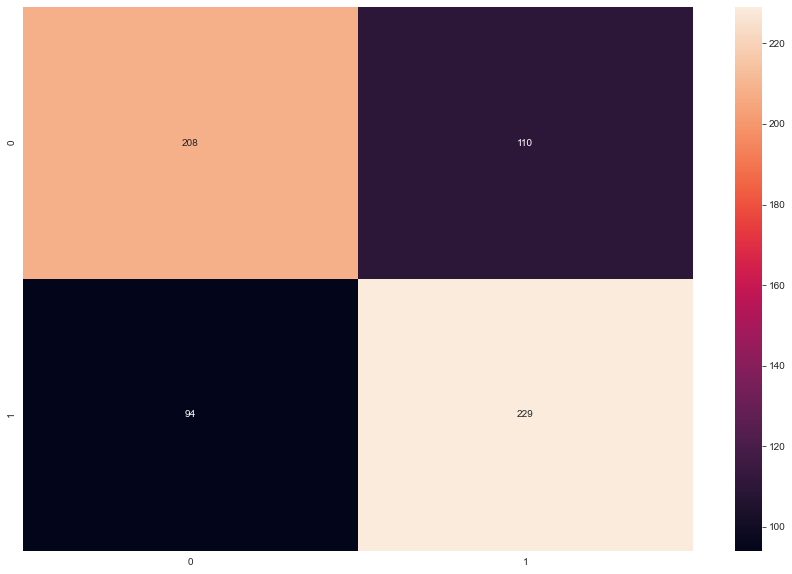

In [99]:
analyze(kn)

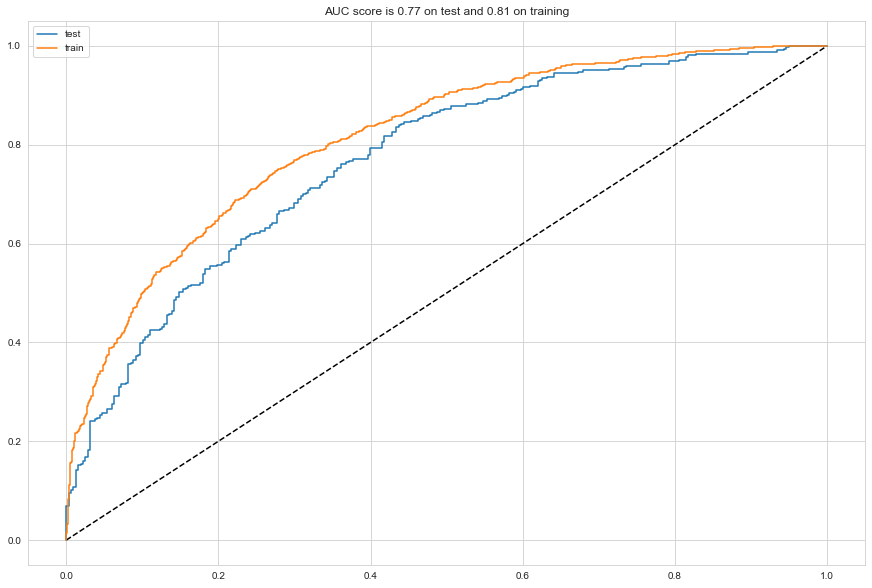

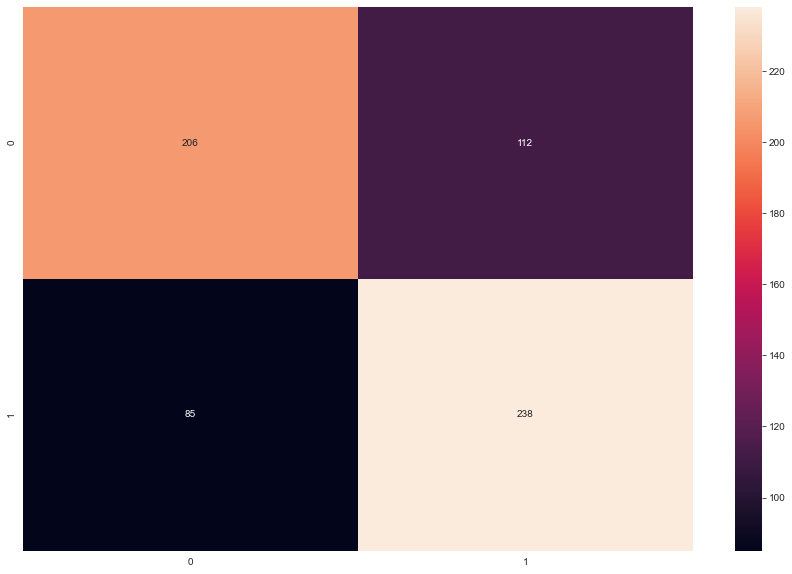

In [100]:
analyze(gb)

# WC simulation

In [101]:
dfs = pd.read_html(r"https://en.wikipedia.org/wiki/2022_FIFA_World_Cup#Teams")

In [102]:
from collections.abc import Iterable

for i in range(len(dfs)):
    df = dfs[i]
    cols = list(df.columns.values)
    if isinstance(cols[0], Iterable):
        if any("Tie-breaking criteria" in c for c in cols):
            start_pos = i+1

        if any("Player/Official" in c for c in cols):
            end_pos = i + 1

print(start_pos, end_pos)

10 84


In [103]:
matches = []
groups = ["A", "B", "C", "D", "E", "F", "G", "H"]
group_count = 0 

table = {}
table[groups[group_count]] = [[a.split(" ")[0], 0, []] for a in list(dfs[start_pos].iloc[:, 1].values)]

for i in range(start_pos+1, end_pos - 1, 1):
    if len(dfs[i].columns) == 3:
        team_1 = dfs[i].columns.values[0]
        team_2 = dfs[i].columns.values[-1]
        
        matches.append((groups[group_count], team_1, team_2))
    else:
        group_count+=1
        if group_count == len(groups):
            break
        table[groups[group_count]] = [[a, 0, []] for a in list(dfs[i].iloc[:, 1].values)]

In [104]:
table

{'A': [['Netherlands', 0, []],
  ['Senegal', 0, []],
  ['Ecuador', 0, []],
  ['Qatar', 0, []]],
 'B': [['England', 0, []],
  ['United States', 0, []],
  ['Iran', 0, []],
  ['Wales', 0, []]],
 'C': [['Argentina', 0, []],
  ['Poland', 0, []],
  ['Mexico', 0, []],
  ['Saudi Arabia', 0, []]],
 'D': [['France', 0, []],
  ['Australia', 0, []],
  ['Tunisia', 0, []],
  ['Denmark', 0, []]],
 'E': [['Japan', 0, []],
  ['Spain', 0, []],
  ['Germany', 0, []],
  ['Costa Rica', 0, []]],
 'F': [['Morocco', 0, []],
  ['Croatia', 0, []],
  ['Belgium', 0, []],
  ['Canada', 0, []]],
 'G': [['Brazil', 0, []],
  ['Switzerland', 0, []],
  ['Cameroon', 0, []],
  ['Serbia', 0, []]],
 'H': [['Portugal', 0, []],
  ['South Korea', 0, []],
  ['Uruguay', 0, []],
  ['Ghana', 0, []]]}

In [105]:
matches[:10]

[('A', 'Qatar', 'Ecuador'),
 ('A', 'Senegal', 'Netherlands'),
 ('A', 'Qatar', 'Senegal'),
 ('A', 'Netherlands', 'Ecuador'),
 ('A', 'Ecuador', 'Senegal'),
 ('A', 'Netherlands', 'Qatar'),
 ('B', 'England', 'Iran'),
 ('B', 'United States', 'Wales'),
 ('B', 'Wales', 'Iran'),
 ('B', 'England', 'United States')]

In [106]:
def find_stats(team_1):
    past_games = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date")
    last5 = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

In [107]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

In [108]:
advanced_group = []
last_group = ""

for k in table.keys():
    for t in table[k]:
        t[1] = 0
        t[2] = []
        
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    

    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    probs_g1 = gb.predict_proba([features_g1])
    probs_g2 = gb.predict_proba([features_g2])
    
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    for i in table[teams[0]]: 
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Group %s advanced: "%(last_group))
            
            for i in table[last_group]:
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Starting Analysis for Group %s "%(teams[0])+"-"*10)
        
        
    if draw == False:
        print("Group %s - %s vs. %s: Winner %s with %.2f probability"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Group %s - %s vs. %s: Draw"%(teams[0], teams[1], teams[2]))
    last_group =  teams[0]

print("\n")
print("Group %s advanced: "%(last_group))

for i in table[last_group]: 
    i[2] = np.mean(i[2])
            
final_points = table[last_group]
final_table = sorted(final_points, key=itemgetter(1, 2), reverse = True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))



---------- Starting Analysis for Group A ----------
Group A - Qatar vs. Ecuador: Winner Ecuador with 0.63 probability
Group A - Senegal vs. Netherlands: Winner Netherlands with 0.63 probability
Group A - Qatar vs. Senegal: Winner Senegal with 0.61 probability
Group A - Netherlands vs. Ecuador: Winner Netherlands with 0.71 probability
Group A - Ecuador vs. Senegal: Draw
Group A - Netherlands vs. Qatar: Winner Netherlands with 0.76 probability


Group A advanced: 
Netherlands -------- 9
Senegal -------- 4
Ecuador -------- 4
Qatar -------- 0


---------- Starting Analysis for Group B ----------
Group B - England vs. Iran: Winner England with 0.63 probability
Group B - United States vs. Wales: Draw
Group B - Wales vs. Iran: Winner Wales with 0.51 probability
Group B - England vs. United States: Draw
Group B - Wales vs. England: Winner England with 0.63 probability
Group B - Iran vs. United States: Winner United States with 0.60 probability


Group B advanced: 
England -------- 7
United S

In [109]:
advanced = advanced_group

In [110]:
playoffs = {"Round of 16": [], "Quarter-Final": [], "Semi-Final": [], "Final": []}

In [111]:
for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "Round of 16":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        
        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        
    else:
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p

----------
Starting simulation of Round of 16
----------


Netherlands vs. United States: Netherlands advances with prob 0.54
Argentina vs. Denmark: Argentina advances with prob 0.62
Spain vs. Croatia: Spain advances with prob 0.58
Brazil vs. Uruguay: Brazil advances with prob 0.65
Senegal vs. England: England advances with prob 0.65
Mexico vs. France: France advances with prob 0.59
Germany vs. Belgium: Belgium advances with prob 0.52
Switzerland vs. Portugal: Portugal advances with prob 0.55
----------
Starting simulation of Quarter-Final
----------


Netherlands vs. Argentina: Argentina advances with prob 0.51
Spain vs. Brazil: Brazil advances with prob 0.55
England vs. France: France advances with prob 0.52
Belgium vs. Portugal: Portugal advances with prob 0.54
----------
Starting simulation of Semi-Final
----------


Argentina vs. Brazil: Argentina advances with prob 0.52
France vs. Portugal: Portugal advances with prob 0.53
----------
Starting simulation of Final
----------


Arge

In [112]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [114]:
plt.figure(figsize=(15, 10))
G = nx.balanced_tree(2, 3)


labels = []


for p in playoffs.keys():
    for game in playoffs[p]:
        label = f"{game[0]}({round(game[2][0], 2)}) \n {game[1]}({round(game[2][1], 2)})"
        labels.append(label)
    
labels_dict = {}
labels_rev = list(reversed(labels))

for l in range(len(list(G.nodes))):
    labels_dict[l] = labels_rev[l]

pos = graphviz_layout(G, prog='twopi')
labels_pos = {n: (k[0], k[1]-0.08*k[1]) for n,k in pos.items()}
center  = pd.DataFrame(pos).mean(axis=1).mean()
    

nx.draw(G, pos = pos, with_labels=False, node_color=range(15), edge_color="#bbf5bb", width=10, font_weight='bold',cmap=plt.cm.Greens, node_size=5000)
nx.draw_networkx_labels(G, pos = labels_pos, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=labels_dict)
texts = ["Round \nof 16", "Quarter \n Final", "Semi \n Final", "Final\n"]
pos_y = pos[0][1] + 55
for text in reversed(texts):
    pos_x = center
    pos_y -= 75 
    plt.text(pos_y, pos_x, text, fontsize = 18)

plt.axis('equal')
plt.show()

ImportError: requires pygraphviz http://pygraphviz.github.io/

<Figure size 1080x720 with 0 Axes>